In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
# import data
data = pd.read_csv("QVI_merged_data.csv")
data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRAND,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural,Natural Chip Compny SeaSalt,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW,WW Original Stacked Chips,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs,CCs Original,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget
5,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly SCreamOnion,175,5,15.0,MIDAGE SINGLES/COUPLES,Budget
6,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla ChpsHnyJlpno Chili,150,3,13.8,MIDAGE SINGLES/COUPLES,Budget
7,2019-05-16,4,4149,3333,16,Smiths,Smiths Crinkle Chips Salt Vinegar,330,1,5.7,MIDAGE SINGLES/COUPLES,Budget
8,2018-07-06,4,4149,3330,46,Kettle,Kettle Original,175,2,10.8,MIDAGE SINGLES/COUPLES,Budget
9,2018-07-18,4,4149,3331,112,Tyrrells,Tyrrells Crisps Ched Chives,165,2,8.4,MIDAGE SINGLES/COUPLES,Budget


<IPython.core.display.Javascript object>

In [4]:
# get new YEARMONTH column
import datetime as dt

months = pd.DatetimeIndex(data["DATE"]).to_period("M")
data.insert(1, "YEARMONTH", months)
data.head()

,DATE,YEARMONTH,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRAND,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,2018-10,1,1000,1,5,Natural,Natural Chip Compny SeaSalt,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,2019-05,1,1307,348,66,CCs,CCs Nacho Cheese,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,2018-11,1,1307,346,96,WW,WW Original Stacked Chips,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,2019-03,1,1307,347,54,CCs,CCs Original,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,2019-05,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget


<IPython.core.display.Javascript object>

MONTHLY_REVENUE
YEARMONTH STORE_NBR                 
2018-07   1                    188.9
          2                    140.5
          3                   1164.9
          4                   1318.3
          5                    763.8
...                              ...
2019-06   268                  220.6
          269                  770.2
          270                  831.2
          271                  884.2
          272                  301.9

[3165 rows x 1 columns]

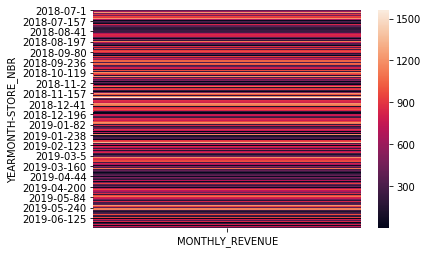

<IPython.core.display.Javascript object>

In [5]:
# Monthly overall sales revenue
monthly_revenue = data.groupby(["YEARMONTH", "STORE_NBR"]).agg(
    MONTHLY_REVENUE=("TOT_SALES", "sum")
)
sns.heatmap(monthly_revenue)
monthly_revenue

In [6]:
# Monthly customers
monthly_customers = data.groupby(["YEARMONTH", "STORE_NBR"]).agg(
    MONTHLY_CUST_PER_STORE=("TXN_ID", "nunique")
)
monthly_customers
# monthly_customers = data.groupby(['YEARMONTH', 'STORE_NBR'])[['TXN_ID']].nunique().rename(columns={'TXN_ID': 'NUM_OF_CUSTOMERS'})
# monthly_customers

MONTHLY_CUST_PER_STORE
YEARMONTH STORE_NBR                        
2018-07   1                              49
          2                              38
          3                             134
          4                             150
          5                             111
...                                     ...
2019-06   268                            38
          269                           114
          270                           114
          271                           123
          272                            36

[3165 rows x 1 columns]

<IPython.core.display.Javascript object>

MONTHLY_TRANS_PER_STORE
YEARMONTH STORE_NBR                         
2018-12   244                              1
2019-03   252                              1
2018-11   31                               1
2019-02   193                              1
          244                              1
...                                      ...
2019-03   88                             169
2019-05   226                            173
2018-07   58                             175
2018-11   226                            178
2018-12   226                            179

[3165 rows x 1 columns]

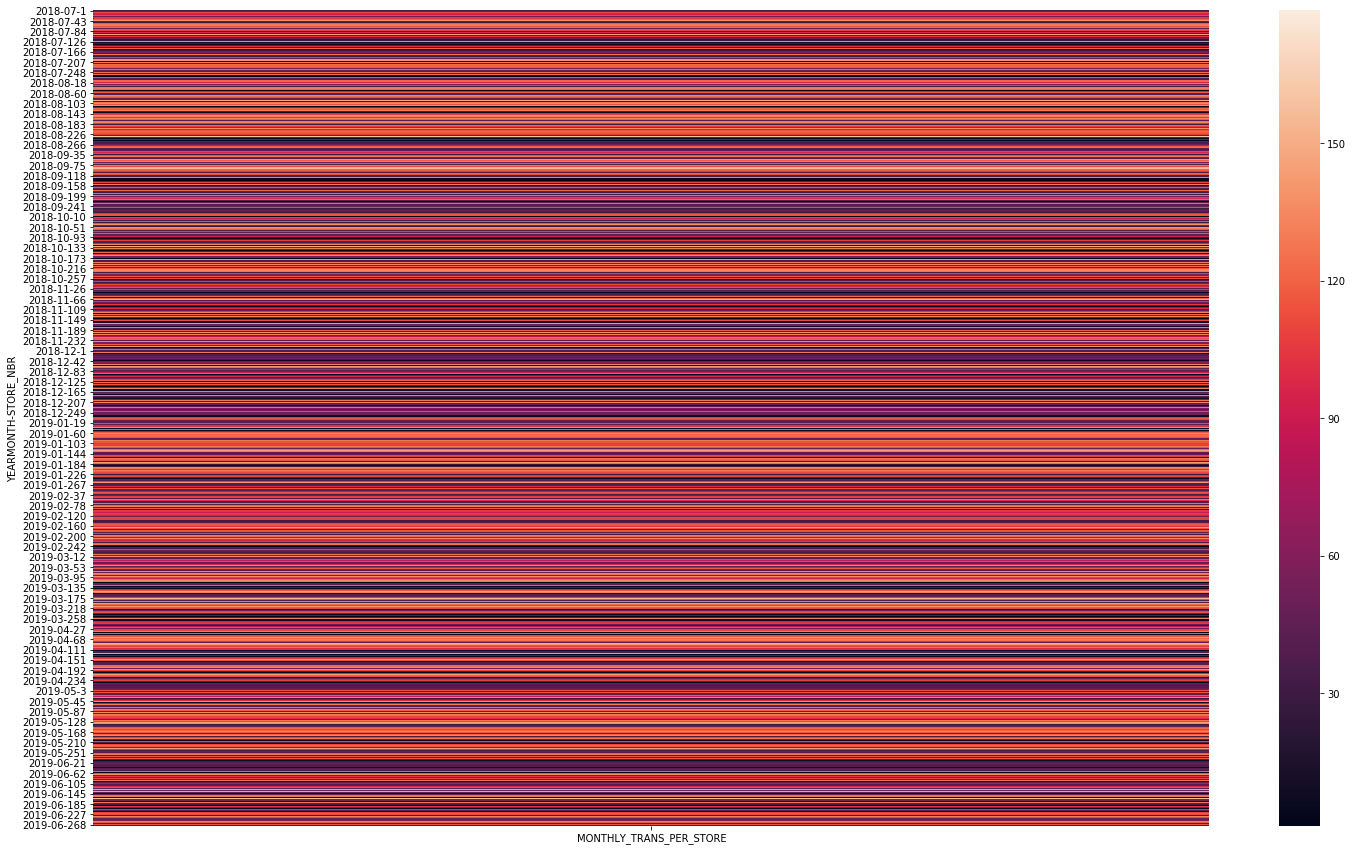

<IPython.core.display.Javascript object>

In [7]:
# Monthly transactions
transactions = data.groupby(["YEARMONTH", "STORE_NBR"]).agg(
    MONTHLY_TRANS_PER_STORE=("TXN_ID", "count")
)
plt.figure(figsize=(25, 15))
sns.heatmap(transactions)
transactions.sort_values(by=["MONTHLY_TRANS_PER_STORE"])

In [8]:
# Set unit prices column
prices = data["TOT_SALES"] / data["PROD_QTY"]
data.insert(11, "PRICE", prices)
data

,DATE,YEARMONTH,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRAND,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,PRICE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,2018-10,1,1000,1,5,Natural,Natural Chip Compny SeaSalt,175,2,6.0,3.00,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,2019-05,1,1307,348,66,CCs,CCs Nacho Cheese,175,3,6.3,2.10,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,2018-11,1,1307,346,96,WW,WW Original Stacked Chips,160,2,3.8,1.90,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,2019-03,1,1307,347,54,CCs,CCs Original,175,1,2.1,2.10,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,2019-05,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken,170,2,2.9,1.45,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,2019-03,272,272319,270088,89,Kettle,Kettle Sweet Chilli And Sour Cream,175,2,10.8,5.40,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,2018-08,272,272358,270154,74,Tostitos,Tostitos Splash Of Lime,175,1,4.4,4.40,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,2018-11,272,272379,270187,51,Doritos,Doritos Mexicana,170,2,8.8,4.40,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,2018-12,272,272379,270188,42,Doritos,Doritos Corn Chip Mexican Jalapeno,150,2,7.8,3.90,YOUNG SINGLES/COUPLES,Premium


<IPython.core.display.Javascript object>

AVG_PRICE
YEARMONTH STORE_NBR           
2018-07   1           3.328571
          2           3.223684
          3           4.432090
          4           4.369079
          5           3.440541
...                        ...
2019-06   268         3.968421
          269         3.378070
          270         3.645614
          271         3.594309
          272         4.405556

[3165 rows x 1 columns]

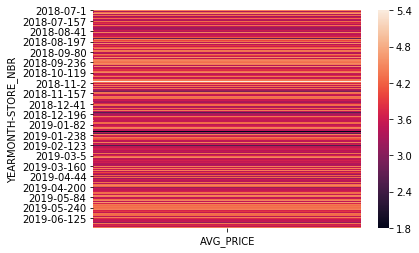

<IPython.core.display.Javascript object>

In [9]:
# Average price per unit
avg_price = data.groupby(["YEARMONTH", "STORE_NBR"]).agg(AVG_PRICE=("PRICE", "mean"))
sns.heatmap(avg_price)
avg_price

In [25]:
# Stores with full observation periods
data.sort_values(by=["YEARMONTH"])
stores = (
    data.groupby(["STORE_NBR"]).agg(OBS_PERIOD=("YEARMONTH", "nunique")).reset_index()
)
stores = list(stores[stores["OBS_PERIOD"] == 12]["STORE_NBR"].to_numpy())
stores.remove(77)
stores.remove(86)
stores.remove(88)
stores

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 87,
 89,
 90,
 91,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 194,
 195,
 

<IPython.core.display.Javascript object>

In [26]:
# All measures
measures = (
    data[(data["YEARMONTH"] < "2019-02") & (data["STORE_NBR"].isin(stores))]
    .groupby(["YEARMONTH", "STORE_NBR"])
    .agg(
        MONTHLY_REVENUE=("TOT_SALES", "sum"),
        MONTHLY_nCUSTOMERS=("TXN_ID", "nunique"),
        MONTHLY_TRANS_PER_STORE=("TXN_ID", "count"),
        AVG_PRICE=("PRICE", "mean"),
    )
    .reset_index()
)
measures.sort_values("YEARMONTH")

,YEARMONTH,STORE_NBR,MONTHLY_REVENUE,MONTHLY_nCUSTOMERS,MONTHLY_TRANS_PER_STORE,AVG_PRICE
0,2018-07,1,188.9,49,49,3.328571
162,2018-07,173,440.8,51,51,4.321569
163,2018-07,174,307.0,37,37,4.302703
164,2018-07,175,954.4,114,116,4.343966
165,2018-07,176,267.6,49,49,3.873469
...,...,...,...,...,...,...
1626,2019-01,100,983.0,139,140,3.510714
1627,2019-01,101,782.0,116,116,3.370690
1628,2019-01,102,865.8,120,122,3.548361
1662,2019-01,137,938.6,127,127,3.695276


<IPython.core.display.Javascript object>

In [61]:
# Calculate correlation between trial and other control stores


def correlation(trial_store):

    metric_table = pd.DataFrame(
        columns=["TRIAL_STORE", "CONTROL_STORE", "CORR_MEASURE"]
    )

    for store in stores:
        metric_table = metric_table.append(
            {
                "TRIAL_STORE": trial_store,
                "CONTROL_STORE": str(store),
                "CORR_MEASURE": measures[
                    (measures["STORE_NBR"] == store)
                    | (measures["STORE_NBR"] == trial_store)
                ][["MONTHLY_REVENUE", "MONTHLY_nCUSTOMERS"]]
                .corr()
                .iloc[0, 1],
            },
            ignore_index=True,
        )
    return metric_table[["CONTROL_STORE", "CORR_MEASURE"]].sort_values(
        by="CORR_MEASURE", ascending=False
    )


# example for trial store 77
correlation(77)

,CONTROL_STORE,CORR_MEASURE
25,27,0.997449
100,110,0.996518
235,251,0.996159
86,96,0.994029
109,120,0.993929
...,...,...
238,255,0.675530
242,259,0.645545
249,266,0.643811
207,223,0.499058


<IPython.core.display.Javascript object>

In [13]:
# Calculate magnitude distance between trial and other control stores
# Calculate magnitude score into one column based on average values like scoreNSales * 0.5 + scoreNCust * 0.5

measures_mr = measures.groupby("STORE_NBR")["MONTHLY_REVENUE"].mean().reset_index()
measures_nc = measures.groupby("STORE_NBR")["MONTHLY_nCUSTOMERS"].mean().reset_index()


def calculateMagnitudeDistance(trial_store):

    magnitude_distance = pd.DataFrame(
        columns=[
            "TRIAL_STORE",
            "CONTROL_STORE",
            "MAGNITUDE_DIST_REVENUE",
            "MAGNITUDE_DIST_nCUSTOMERS",
            "MAGNITUDE_DIST_AVG",
        ]
    )

    for store in stores:

        control_store_revenue = measures_mr[measures_mr["STORE_NBR"] == store][
            "MONTHLY_REVENUE"
        ].iloc[0]
        trial_store_revenue = measures_mr[measures_mr["STORE_NBR"] == trial_store][
            "MONTHLY_REVENUE"
        ].iloc[0]
        control_store_ncustomer = measures_nc[measures_mr["STORE_NBR"] == store][
            "MONTHLY_nCUSTOMERS"
        ].iloc[0]
        trial_store_ncustomer = measures_nc[measures_nc["STORE_NBR"] == trial_store][
            "MONTHLY_nCUSTOMERS"
        ].iloc[0]

        magnitude_distance = magnitude_distance.append(
            {
                "TRIAL_STORE": trial_store,
                "CONTROL_STORE": store,
                "MAGNITUDE_DIST_REVENUE": abs(
                    control_store_revenue - trial_store_revenue
                ),
                "MAGNITUDE_DIST_nCUSTOMERS": abs(
                    control_store_ncustomer - trial_store_ncustomer
                ),
                "MAGNITUDE_DIST_AVG": abs(control_store_revenue - trial_store_revenue)
                * 0.5
                + abs(control_store_ncustomer - trial_store_ncustomer) * 0.5,
            },
            ignore_index=True,
        )

    return magnitude_distance[["MAGNITUDE_DIST_AVG"]]

<IPython.core.display.Javascript object>

In [14]:
# Scale magnitude distance to range 0-1
from sklearn import preprocessing
from sklearn.preprocessing import scale


def scale_magnitude(magnitude):

    magnitude_matrix = magnitude.values.reshape(-1, 1)

    scaled = preprocessing.MinMaxScaler()
    scaled_md = scaled.fit_transform(magnitude_matrix)

    return pd.DataFrame(data=scaled_md, columns=["MAGNITUDE"])

<IPython.core.display.Javascript object>

In [15]:
# Calculate average score between correlation and magnitude like magnitude * 0.5 + correlation * 0.5


def average_score(magnitude, correlation):

    stores_df = pd.DataFrame(data=stores, columns=["STORE_NBR"])
    avg_scores = pd.concat([stores_df, magnitude, correlation], axis=1)
    avg_scores["FINAL_SCORE"] = avg_scores.apply(
        lambda x: x["MAGNITUDE"] * 0.5 + x["CORR_MEASURE"] * 0.5, axis=1
    )
    return avg_scores

<IPython.core.display.Javascript object>

In [16]:
# Trial store 77

md_77 = scale_magnitude(calculateMagnitudeDistance(77))
corr_77 = correlation(77)

avg_77 = average_score(md_77, corr_77)
avg_77.sort_values(by="FINAL_SCORE", ascending=False).head(10)

,STORE_NBR,MAGNITUDE,CORR_MEASURE,FINAL_SCORE
213,226,1.000000,0.998968,0.999484
224,237,0.905694,0.997617,0.951655
82,88,0.895978,0.998296,0.947137
157,165,0.883188,0.998443,0.940816
54,58,0.863458,0.998349,0.930904
3,4,0.863148,0.998433,0.930791
193,203,0.827898,0.998047,0.912973
37,40,0.818340,0.998130,0.908235
189,199,0.815334,0.997861,0.906597
24,26,0.784824,0.998428,0.891626


<IPython.core.display.Javascript object>

In [17]:
# Trial store 86

md_86 = scale_magnitude(calculateMagnitudeDistance(86))
corr_86 = correlation(86)

avg_86 = average_score(md_86, corr_86)
avg_86.sort_values(by="FINAL_SCORE", ascending=False).head(10)

,STORE_NBR,MAGNITUDE,CORR_MEASURE,FINAL_SCORE
92,99,1.000000,0.999357,0.999678
188,198,0.993854,0.999356,0.996605
244,258,0.992468,0.999374,0.995921
132,140,0.991498,0.999338,0.995418
138,146,0.991467,0.999345,0.995406
253,267,0.990712,0.999327,0.995020
39,42,0.989911,0.999318,0.994615
151,159,0.988925,0.999290,0.994108
231,244,0.988248,0.999328,0.993788
249,263,0.987431,0.999301,0.993366


<IPython.core.display.Javascript object>

In [18]:
# Trial store 88

md_88 = scale_magnitude(calculateMagnitudeDistance(88))
corr_88 = correlation(88)

avg_88 = average_score(md_88, corr_88)
avg_88.sort_values(by="FINAL_SCORE", ascending=False).head(10)

,STORE_NBR,MAGNITUDE,CORR_MEASURE,FINAL_SCORE
92,99,1.000000,0.999209,0.999605
188,198,0.995895,0.999210,0.997553
244,258,0.994969,0.999217,0.997093
138,146,0.994301,0.999227,0.996764
132,140,0.994321,0.999190,0.996755
253,267,0.993797,0.999176,0.996486
39,42,0.993262,0.999171,0.996216
151,159,0.992603,0.999121,0.995862
231,244,0.992151,0.999198,0.995674
249,263,0.991605,0.999164,0.995385


<IPython.core.display.Javascript object>